The EPA's current 24 hour standard for ozone is 0.070 parts per million (ppm) as the fourth-highest daily maximum 8-hour concentration, averaged across three consecutive years. In this study, I will look only at the daily average 8-hour concentrations.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
%matplotlib inline

### Load 1999 data and perform exploratory data analysis

In [2]:
ozone0 = pd.read_csv('C:\\Users\\Mary\\CIS5898\\daily_44201_1999.csv', low_memory=False) 

In [3]:
print(ozone0.info()) #provides basic information on data
print(ozone0.ndim) #provides dimensions
print(ozone0.shape) #provides number of rows and number of columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317682 entries, 0 to 317681
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   State Code           317682 non-null  object 
 1   County Code          317682 non-null  int64  
 2   Site Num             317682 non-null  int64  
 3   Parameter Code       317682 non-null  int64  
 4   POC                  317682 non-null  int64  
 5   Latitude             317682 non-null  float64
 6   Longitude            317682 non-null  float64
 7   Datum                317682 non-null  object 
 8   Parameter Name       317682 non-null  object 
 9   Sample Duration      317682 non-null  object 
 10  Pollutant Standard   317682 non-null  object 
 11  Date Local           317682 non-null  object 
 12  Units of Measure     317682 non-null  object 
 13  Event Type           317682 non-null  object 
 14  Observation Count    317682 non-null  int64  
 15  Observation Perce

In [4]:
#There are 317,682 rows and 29 columns. Because there are so many columns, look at the first five rows and first 10 columns
ozone0.iloc[:5, :10]

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration
0,01,27,1,44201,1,33.284928,-85.803608,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR
1,01,27,1,44201,1,33.284928,-85.803608,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR
2,01,27,1,44201,1,33.284928,-85.803608,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR
3,01,27,1,44201,1,33.284928,-85.803608,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR
4,01,27,1,44201,1,33.284928,-85.803608,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR


In [5]:
#Look at the first five rows and next 9 columns
ozone0.iloc[:5, 11:20]

,Date Local,Units of Measure,Event Type,Observation Count,Observation Percent,Arithmetic Mean,1st Max Value,1st Max Hour,AQI
0,1999-02-28,Parts per million,None,1,6.0,0.029000,0.029,23,27
1,1999-03-01,Parts per million,None,17,100.0,0.027118,0.047,10,44
2,1999-03-02,Parts per million,None,17,100.0,0.049647,0.060,12,67
3,1999-03-03,Parts per million,None,17,100.0,0.039059,0.044,11,41
4,1999-03-04,Parts per million,None,17,100.0,0.032529,0.044,9,41


In [6]:
#Look at the first five rows and the final columns
ozone0.iloc[:5, 21:]

,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,-,ASHLAND,ASHLAND AIRPORT,Alabama,Clay,Ashland,NaN,2018-07-20
1,-,ASHLAND,ASHLAND AIRPORT,Alabama,Clay,Ashland,NaN,2018-07-20
2,-,ASHLAND,ASHLAND AIRPORT,Alabama,Clay,Ashland,NaN,2018-07-20
3,-,ASHLAND,ASHLAND AIRPORT,Alabama,Clay,Ashland,NaN,2018-07-20
4,-,ASHLAND,ASHLAND AIRPORT,Alabama,Clay,Ashland,NaN,2018-07-20


### Clean 1999 dataset

In [7]:
len(ozone0)

317682

In [8]:
#Check whether there are multiple sample durations
ozone0.groupby('Sample Duration').size()

Sample Duration
8-HR RUN AVG BEGIN HOUR    317682
dtype: int64

In [9]:
#Check whether there are excluded observations in event type
ozone0.groupby('Event Type').size()

Event Type
Excluded        19
Included     18925
None        298738
dtype: int64

In [10]:
#remove excluded event type observations
ozone0NonExcluded = ozone0[ozone0['Event Type'] !=  'Excluded']
len(ozone0NonExcluded)

317663

In [11]:
#check for non U.S. states 
ozone0NonExcluded['State Name'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District Of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Puerto Rico',
       'Virgin Islands', 'Country Of Mexico', 'Canada'], dtype=object)

In [12]:
len(ozone0NonExcluded['State Name'].unique())

55

In [13]:
print(np.count_nonzero(ozone0NonExcluded['State Name']== 'District Of Columbia' ))
print(np.count_nonzero(ozone0NonExcluded['State Name']== 'Puerto Rico'))
print(np.count_nonzero(ozone0NonExcluded['State Name']== 'Virgin Islands' ))
print(np.count_nonzero(ozone0NonExcluded['State Name']== 'Country Of Mexico' ))
print(np.count_nonzero(ozone0NonExcluded['State Name']== 'Canada' ))

1091
250
363
3061
188


In [14]:
#remove observations from District of Columbia, Puerto Rico, Virgin Islands, Mexico, and Canada
ozone0Cleaned = ozone0NonExcluded[(ozone0NonExcluded['State Name'] != 'District Of Columbia') 
                & (ozone0NonExcluded['State Name'] != 'Puerto Rico')
                & (ozone0NonExcluded['State Name'] != 'Virgin Islands')
                & (ozone0NonExcluded['State Name'] != 'Country Of Mexico')                  
                & (ozone0NonExcluded['State Name'] != 'Canada')]


In [15]:
len(ozone0Cleaned)

312710

In [16]:
#save cleaned dataset 
ozone0Cleaned.to_csv('C:\\Users\\Mary\\CIS5898\\FIT_capstone\\daily_44201_1999_cleaned.csv', header = True)

### Extract arithmetic mean from 1999 dataset as series and print descriptive statistics

Original (uncleaned) and cleaned datasets

In [17]:
#uncleaned 1999
x0 = ozone0['Arithmetic Mean']
x0.describe()

count    317682.000000
mean          0.033290
std           0.015258
min           0.000000
25%           0.022059
50%           0.032412
75%           0.043176
max           0.111529
Name: Arithmetic Mean, dtype: float64

In [18]:
#cleaned 1999
x0_cleaned = ozone0Cleaned['Arithmetic Mean']
x0_cleaned.describe()

count    312710.000000
mean          0.033382
std           0.015265
min           0.000000
25%           0.022176
50%           0.032471
75%           0.043235
max           0.111529
Name: Arithmetic Mean, dtype: float64

### Load 2012 data and perform exploratory data analysis

In [19]:
ozone1 = pd.read_csv('C:\\Users\\Mary\\CIS5898\\daily_44201_2012.csv') 

In [20]:
print(ozone1.info()) 
print(ozone1.ndim) 
print(ozone1.shape) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386439 entries, 0 to 386438
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   State Code           386439 non-null  int64  
 1   County Code          386439 non-null  int64  
 2   Site Num             386439 non-null  int64  
 3   Parameter Code       386439 non-null  int64  
 4   POC                  386439 non-null  int64  
 5   Latitude             386439 non-null  float64
 6   Longitude            386439 non-null  float64
 7   Datum                386439 non-null  object 
 8   Parameter Name       386439 non-null  object 
 9   Sample Duration      386439 non-null  object 
 10  Pollutant Standard   386439 non-null  object 
 11  Date Local           386439 non-null  object 
 12  Units of Measure     386439 non-null  object 
 13  Event Type           386439 non-null  object 
 14  Observation Count    386439 non-null  int64  
 15  Observation Perce

### Clean 2012 dataset

In [21]:
len(ozone1)

386439

In [22]:
#Check whether there are multiple sample durations
ozone1.groupby('Sample Duration').size()

Sample Duration
8-HR RUN AVG BEGIN HOUR    386439
dtype: int64

In [23]:
#Check whether there are excluded observations in event type
ozone1.groupby('Event Type').size()

Event Type
Excluded       354
Included     12538
None        373547
dtype: int64

In [24]:
#remove excluded event type observations
ozone1NonExcluded = ozone1[ozone1['Event Type'] !=  'Excluded']
len(ozone1NonExcluded)

386085

In [25]:
#check for non U.S. states 
ozone1NonExcluded['State Name'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District Of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Puerto Rico',
       'Country Of Mexico'], dtype=object)

In [26]:
len(ozone1NonExcluded['State Name'].unique())

53

In [27]:
print(np.count_nonzero(ozone1NonExcluded['State Name']== 'District Of Columbia' ))
print(np.count_nonzero(ozone1NonExcluded['State Name']== 'Puerto Rico'))
print(np.count_nonzero(ozone1NonExcluded['State Name']== 'Virgin Islands' ))
print(np.count_nonzero(ozone1NonExcluded['State Name']== 'Country Of Mexico' ))
print(np.count_nonzero(ozone1NonExcluded['State Name']== 'Canada' ))

729
676
0
1432
0


In [28]:
#remove observations from District of Columbia, Puerto Rico, and Mexico
ozone1Cleaned = ozone1NonExcluded[(ozone1NonExcluded['State Name'] != 'District Of Columbia') 
                & (ozone1NonExcluded['State Name'] != 'Puerto Rico')                  
                & (ozone1NonExcluded['State Name'] != 'Country Of Mexico')]


In [29]:
len(ozone1Cleaned)

383248

In [30]:
#save cleaned dataset 
ozone1Cleaned.to_csv('C:\\Users\\Mary\\CIS5898\\FIT_capstone\\daily_44201_2012_cleaned.csv', header = True)

### Extract arithmetic mean from 2012 dataset as series and print descriptive statistics

Original (uncleaned) and cleaned datasets

In [31]:
#uncleaned 2012
x1 = ozone1['Arithmetic Mean']
x1.describe()

count    386439.000000
mean          0.033289
std           0.012707
min           0.000000
25%           0.024176
50%           0.032647
75%           0.041765
max           0.097100
Name: Arithmetic Mean, dtype: float64

In [32]:
#cleaned 2012
x1_cleaned = ozone1Cleaned['Arithmetic Mean']
x1_cleaned.describe()

count    383248.000000
mean          0.033346
std           0.012677
min           0.000000
25%           0.024235
50%           0.032706
75%           0.041765
max           0.097100
Name: Arithmetic Mean, dtype: float64

### Read in 2020 dataset

In [33]:
ozone2 = pd.read_csv('C:\\Users\\Mary\\CIS5898\\daily_44201_2020.csv')

### Clean 2020 dataset

In [34]:
len(ozone2)

391923

In [35]:
#Check whether there are multiple sample durations
ozone2.groupby('Sample Duration').size()

Sample Duration
8-HR RUN AVG BEGIN HOUR    391923
dtype: int64

In [36]:
#Check whether there are excluded observations in event type
ozone2.groupby('Event Type').size()

Event Type
Excluded       369
Included      8208
None        383346
dtype: int64

In [37]:
#remove excluded event type observations
ozone2NonExcluded = ozone2[ozone2['Event Type'] !=  'Excluded']
len(ozone2NonExcluded)

391554

In [38]:
#check for non U.S. states 
ozone2NonExcluded['State Name'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District Of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Puerto Rico',
       'Country Of Mexico'], dtype=object)

In [39]:
len(ozone2NonExcluded['State Name'].unique())

53

In [40]:
print(np.count_nonzero(ozone2NonExcluded['State Name']== 'District Of Columbia' ))
print(np.count_nonzero(ozone2NonExcluded['State Name']== 'Puerto Rico'))
print(np.count_nonzero(ozone2NonExcluded['State Name']== 'Virgin Islands' ))
print(np.count_nonzero(ozone2NonExcluded['State Name']== 'Country Of Mexico' ))
print(np.count_nonzero(ozone2NonExcluded['State Name']== 'Canada' ))

1088
981
0
146
0


In [41]:
#remove observations from District of Columbia, Puerto Rico, and Mexico
ozone2Cleaned = ozone2NonExcluded[(ozone2NonExcluded['State Name'] != 'District Of Columbia') 
                & (ozone2NonExcluded['State Name'] != 'Puerto Rico')                  
                & (ozone2NonExcluded['State Name'] != 'Country Of Mexico')]

In [42]:
len(ozone2Cleaned)

389339

In [43]:
#save cleaned dataset 
ozone2Cleaned.to_csv('C:\\Users\\Mary\\CIS5898\\FIT_capstone\\daily_44201_2020_cleaned.csv', header = True)

### Extract arithmetic mean from 2020 dataset as series and print descriptive statistics

Original (uncleaned) and cleaned datasets

In [44]:
#uncleaned 2020
x2 = ozone2['Arithmetic Mean']
x2.describe()

count    391923.000000
mean          0.030817
std           0.010771
min          -0.003300
25%           0.023235
50%           0.030706
75%           0.038059
max           0.135529
Name: Arithmetic Mean, dtype: float64

In [45]:
#cleaned 2020
x2_cleaned = ozone2Cleaned['Arithmetic Mean']
x2_cleaned.describe()

count    389339.000000
mean          0.030859
std           0.010717
min          -0.003300
25%           0.023294
50%           0.030706
75%           0.038059
max           0.135529
Name: Arithmetic Mean, dtype: float64

In [46]:
#Look into the number of negative numbers in ozone 2020 dataset
countNegativeValues = np.count_nonzero(x2_cleaned < 0) #find count of negative values
print(countNegativeValues)
print((countNegativeValues / len(ozone2Cleaned)) * 100) #find percentage of negative values 

4
0.0010273823069356011


In [47]:
#Ignore the 4 negative values in the 2020 dataset.

### Compare aggregate changes in ozone for years 1999, 2012, and 2020

Text(0, 0.5, 'ozone concentration (ppm)')

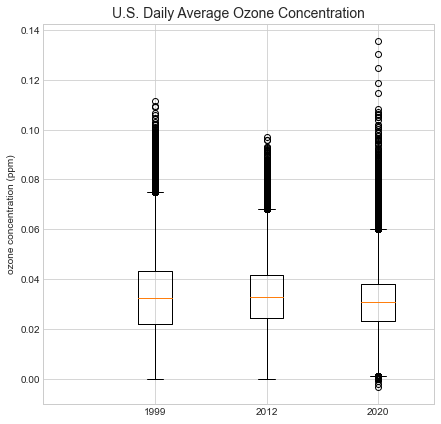

In [48]:
#make boxplots
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize = [7, 7]) 
years = [x0_cleaned, x1_cleaned, x2_cleaned]
plt.boxplot(years)
plt.title('U.S. Daily Average Ozone Concentration', fontsize=14)
plt.xticks(np.arange(4), ['', '1999','2012', '2020'])
plt.ylabel('ozone concentration (ppm)')

In [49]:
plt.close()

The boxplot shows similar median ozone concentrations across the three years, with the median ozone concentration in 2020 slightly lower. The range of data in 1999 is the highest. The interquartile range decreases from 1999 to 2020. The 2020 dataset has the most outliers.


Text(0, 0.5, 'ozone concentration (ppm)')

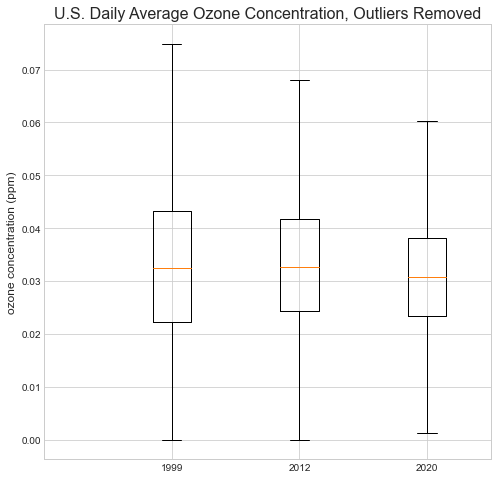

In [50]:
#re-create the boxplots removing the outliers to better visualize the distribution
fig1 = plt.figure(figsize = [8, 8]) #make larger
years = [x0_cleaned, x1_cleaned, x2_cleaned]
plt.boxplot(years, showfliers=False)
plt.title('U.S. Daily Average Ozone Concentration, Outliers Removed', fontsize=16)
plt.xticks(np.arange(4), ['', '1999','2012', '2020'])
plt.ylabel('ozone concentration (ppm)', fontsize=12)

In [51]:
plt.close()

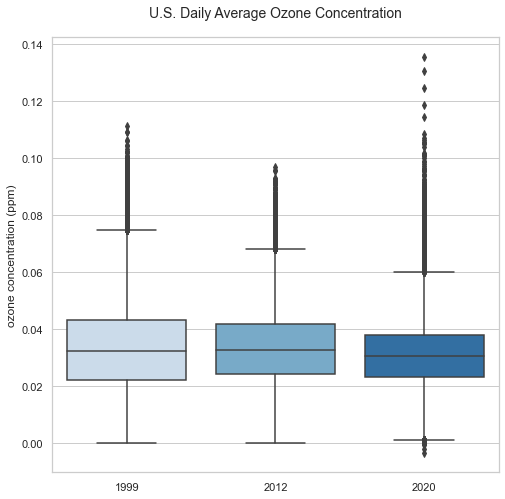

In [52]:
#Re-create boxplots using seaborn boxplots  
#Create separate dataframes for arithmetic year series, add a year column and combine dataframes
#Code modified from https://stackoverflow.com/questions/42004381/box-plot-of-a-many-pandas-dataframes
df0 = pd.DataFrame(x0_cleaned.to_frame()).assign(Year=1999)
df1 = pd.DataFrame(x1_cleaned.to_frame()).assign(Year=2012)
df2 = pd.DataFrame(x2_cleaned.to_frame()).assign(Year=2020)
cdf = pd.concat([df0, df1, df2])
sns.set(style='whitegrid', context='notebook', rc={'figure.figsize': (8,8)})
ax = sns.boxplot(x="Year", y="Arithmetic Mean", data=cdf, palette='Blues')  
ax.set_title('U.S. Daily Average Ozone Concentration', pad=20, fontsize=14)
ax.set_ylabel('ozone concentration (ppm)', fontsize=12)
ax.set_xlabel('')
plt.savefig('o_boxplot')


In [53]:
plt.close()

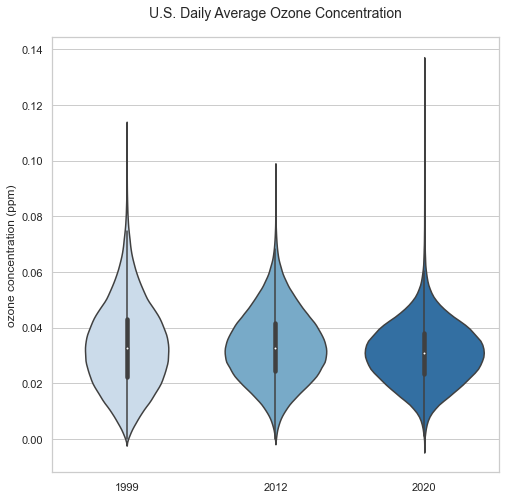

In [54]:
#make a violin plot
sns.set(style='whitegrid', context='notebook', rc={'figure.figsize': (8,8)})
ax = sns.violinplot(x = 'Year', y = 'Arithmetic Mean', data = cdf, palette = 'Blues')
ax.set_title('U.S. Daily Average Ozone Concentration', pad=20, fontsize=14)
ax.set_ylabel('ozone concentration (ppm)', fontsize=12)
ax.set_xlabel('')
plt.savefig('o_violinplot')

In [55]:
plt.close()

### How have state levels of ozone changed over time?

In [56]:
#calculate the ozone for each state in 1999, 2012, and 2020
mn0 = ozone0Cleaned['Arithmetic Mean'].groupby(ozone0Cleaned['State Name']).mean()
mn1 = ozone1Cleaned['Arithmetic Mean'].groupby(ozone1Cleaned['State Name']).mean()
mn2 = ozone2Cleaned['Arithmetic Mean'].groupby(ozone2Cleaned['State Name']).mean()

In [57]:
#Make separate data frames for states / years
d0 = pd.DataFrame(mn0.to_frame().reset_index())
d1 = pd.DataFrame(mn1.to_frame().reset_index())
d2 = pd.DataFrame(mn2.to_frame().reset_index())

In [58]:
#save d1, a dataframe for ozone arithmetic means grouped by states, for future studies
d1.to_csv('C:\\Users\\Mary\\CIS5898\\FIT_capstone\\44201_2012_byState.csv', header = True)

### Compare 1999 and 2012 ozone levels

In [59]:
mrg = pd.merge(d0, d1, on = 'State Name')

[Text(1, 0, '1999'), Text(3, 0, '2012')]

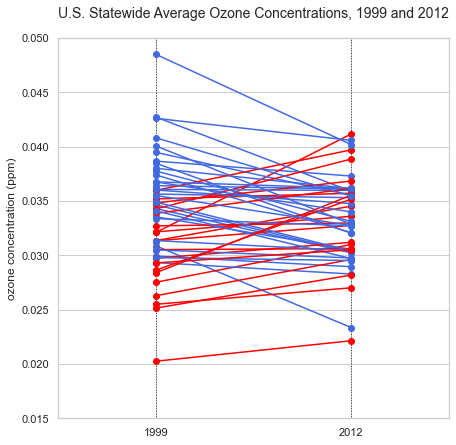

In [60]:
#Code for this plot was modified from author Selva Prabhakaran's slope chart on
#https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/
import matplotlib.lines as mlines

def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='royalblue' if p1[1]-p2[1] > 0 else 'red',  marker='o', markersize=6)
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1,1, figsize=(7,7))

# Vertical Lines 
ax.vlines(x=1, ymin= 0, ymax=1, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=0, ymax=1, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=mrg['Arithmetic Mean_x'], x=np.repeat(1, mrg.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=mrg['Arithmetic Mean_y'], x=np.repeat(3, mrg.shape[0]), s=10, color='black', alpha=0.7)

# Line Segments and Annotation
for p1, p2, c in zip(mrg['Arithmetic Mean_x'], mrg['Arithmetic Mean_y'], mrg['State Name']):
    newline([1,p1], [3,p2])
    
# Title and Labels
ax.set_title('U.S. Statewide Average Ozone Concentrations, 1999 and 2012', pad=20, fontsize=14)
ax.set(xlim=(0,4), ylim=(0.015,0.05), ylabel='ozone concentration (ppm)')
ax.set_xticks([1,3])
ax.set_xticklabels(['1999', '2012'])

More states have decreased ozone levels from 1999 to 2012 than increased levels. Increases are depicted with red lines.

In [61]:
plt.close()

In [62]:
#which states have increased levels of ozone?
ozone0StateIncrease = mrg[mrg['Arithmetic Mean_y'] > mrg['Arithmetic Mean_x']].copy()
ozone0StateIncrease['Difference'] = ozone0StateIncrease['Arithmetic Mean_y'] - ozone0StateIncrease['Arithmetic Mean_x']
ozone0StateIncreaseSorted = ozone0StateIncrease.sort_values('Difference', ascending = False)
ozone0StateIncreaseSorted

,State Name,Arithmetic Mean_x,Arithmetic Mean_y,Difference
5,Colorado,0.032102,0.041155,0.009052
40,South Dakota,0.028387,0.035528,0.007140
26,Nebraska,0.028622,0.035165,0.006543
27,Nevada,0.034262,0.038848,0.004586
24,Missouri,0.035966,0.039694,0.003728
12,Illinois,0.027519,0.030986,0.003468
25,Montana,0.026276,0.029614,0.003337
15,Kansas,0.031351,0.034516,0.003165
36,Oregon,0.025139,0.028179,0.003040
35,Oklahoma,0.033853,0.036145,0.002293


In [63]:
#repeat limiting ozone to 3 decimal places

In [64]:
#calculate the ozone for each state in 1999, 2012, and 2020
mn0Rounded3 = round(ozone0Cleaned['Arithmetic Mean'].groupby(ozone0Cleaned['State Name']).mean(),3)
mn1Rounded3 = round(ozone1Cleaned['Arithmetic Mean'].groupby(ozone1Cleaned['State Name']).mean(),3)
mn2Rounded3 = round(ozone2Cleaned['Arithmetic Mean'].groupby(ozone2Cleaned['State Name']).mean(),3)

In [65]:
#Make separate data frames for states / years
d0Rounded3 = pd.DataFrame(mn0Rounded3.to_frame().reset_index())
d1Rounded3 = pd.DataFrame(mn1Rounded3.to_frame().reset_index())
d2Rounded3 = pd.DataFrame(mn2Rounded3.to_frame().reset_index())

In [66]:
#save d1Rounded3, a dataframe for ozone arithmetic means grouped by states, for future studies
d1Rounded3.to_csv('C:\\Users\\Mary\\CIS5898\\FIT_capstone\\44201_2012_byState_Rounded3.csv', header = True)

In [67]:
mrgRounded3 = pd.merge(d0Rounded3, d1Rounded3, on = 'State Name')

[Text(1, 0, '1999'), Text(3, 0, '2012')]

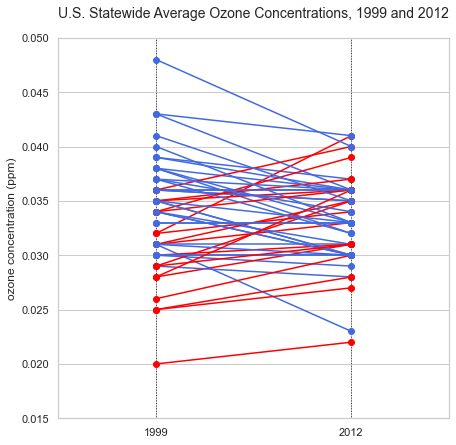

In [68]:
#Code for this plot was modified from author Selva Prabhakaran's slope chart on
#https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/
import matplotlib.lines as mlines

def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='royalblue' if p1[1]-p2[1] >= 0 else 'red',  marker='o', markersize=6)
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1,1, figsize=(7,7))

# Vertical Lines 
ax.vlines(x=1, ymin= 0, ymax=1, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=0, ymax=1, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=mrgRounded3['Arithmetic Mean_x'], x=np.repeat(1, mrgRounded3.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=mrgRounded3['Arithmetic Mean_y'], x=np.repeat(3, mrgRounded3.shape[0]), s=10, color='black', alpha=0.7)

# Line Segments and Annotation
for p1, p2, c in zip(mrgRounded3['Arithmetic Mean_x'], mrgRounded3['Arithmetic Mean_y'], mrgRounded3['State Name']):
    newline([1,p1], [3,p2])
    
# Title and Labels
ax.set_title('U.S. Statewide Average Ozone Concentrations, 1999 and 2012', pad=20, fontsize=14)
ax.set(xlim=(0,4), ylim=(0.015,0.05), ylabel='ozone concentration (ppm)')
ax.set_xticks([1,3])
ax.set_xticklabels(['1999', '2012'])

In [69]:
fig.savefig('o_slopechart_99_12')

In [70]:
plt.close()

In [71]:
#which states have increased levels of ozone?
ozone0StateIncreaseRounded3 = mrgRounded3[mrgRounded3['Arithmetic Mean_y'] > mrgRounded3['Arithmetic Mean_x']].copy()
ozone0StateIncreaseRounded3['Difference'] = ((ozone0StateIncreaseRounded3['Arithmetic Mean_y']) - (ozone0StateIncreaseRounded3['Arithmetic Mean_x'])).copy()
ozone0StateIncreaseRounded3Sorted = ozone0StateIncreaseRounded3.sort_values('Difference', ascending = False)
ozone0StateIncreaseRounded3Sorted

,State Name,Arithmetic Mean_x,Arithmetic Mean_y,Difference
5,Colorado,0.032,0.041,0.009
40,South Dakota,0.028,0.036,0.008
26,Nebraska,0.029,0.035,0.006
27,Nevada,0.034,0.039,0.005
15,Kansas,0.031,0.035,0.004
24,Missouri,0.036,0.040,0.004
25,Montana,0.026,0.030,0.004
12,Illinois,0.028,0.031,0.003
36,Oregon,0.025,0.028,0.003
3,Arkansas,0.032,0.034,0.002


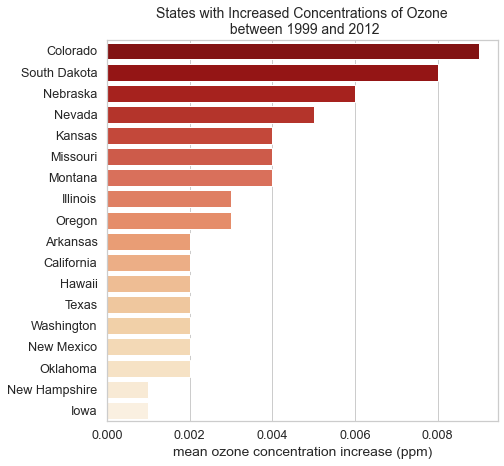

In [72]:
#create barplot
sns.set(style='whitegrid', context='notebook', rc={'figure.figsize': (7,7)}, font_scale=1.15)
sns.barplot(x = ozone0StateIncreaseRounded3Sorted['Difference'], y = ozone0StateIncreaseRounded3Sorted['State Name'], palette = 'OrRd_r')
plt.xlabel('mean ozone concentration increase (ppm)')
plt.ylabel('')
plt.title('States with Increased Concentrations of Ozone\n between 1999 and 2012', fontsize = 14)
plt.savefig('o_barchartincreaseslopechart_99_12')

In [73]:
plt.close()

### Compare 2012 and 2020 ozone levels

In [74]:
mrg1 = pd.merge(d1, d2, on = 'State Name')

[Text(1, 0, '2012'), Text(3, 0, '2022')]

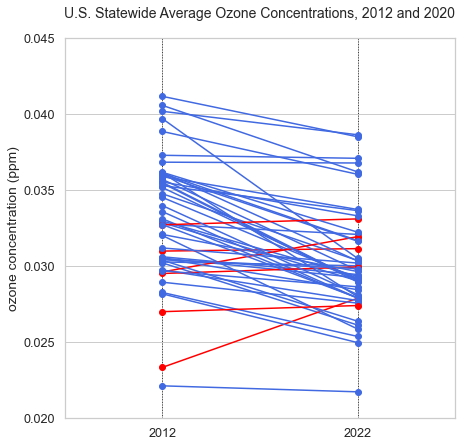

In [75]:
#Code for this plot was modified from author Selva Prabhakaran's slope chart on
#https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/
import matplotlib.lines as mlines

def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='royalblue' if p1[1]-p2[1] >= 0 else 'red',  marker='o', markersize=6)
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1,1,figsize=(7,7))

# Vertical Lines 
ax.vlines(x=1, ymin= 0, ymax=1, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=0, ymax=1, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=mrg1['Arithmetic Mean_x'], x=np.repeat(1, mrg1.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=mrg1['Arithmetic Mean_y'], x=np.repeat(3, mrg1.shape[0]), s=10, color='black', alpha=0.7)

# Line Segments and Annotation
for p1, p2, c in zip(mrg1['Arithmetic Mean_x'], mrg1['Arithmetic Mean_y'], mrg1['State Name']):
    newline([1,p1], [3,p2])
    
# Title and Lables
ax.set_title('U.S. Statewide Average Ozone Concentrations, 2012 and 2020', pad=20, fontsize=14)
ax.set(xlim=(0,4), ylim=(0.020,0.045), ylabel='ozone concentration (ppm)')
ax.set_xticks([1,3])
ax.set_xticklabels(['2012', '2022'])

Most states have decreased average ozone levels from 2012 to 2020. A handful of states
have increased average levels; increases are depicted with red lines.

In [76]:
plt.close()

In [77]:
#which states have increased levels of ozone?
ozone1StateIncrease = mrg1[mrg1['Arithmetic Mean_y'] > mrg1['Arithmetic Mean_x']].copy()
ozone1StateIncrease['Difference'] = ozone1StateIncrease['Arithmetic Mean_y'] - ozone1StateIncrease['Arithmetic Mean_x'] 
ozone1StateIncreaseSorted = ozone1StateIncrease.sort_values('Difference', ascending = False)
ozone1StateIncreaseSorted

,State Name,Arithmetic Mean_x,Arithmetic Mean_y,Difference
1,Alaska,0.023342,0.027887,0.004545
25,Montana,0.029614,0.031933,0.002319
31,New York,0.029514,0.029945,0.000431
46,Washington,0.027005,0.027408,0.000403
38,Rhode Island,0.032713,0.033101,0.000388
12,Illinois,0.030986,0.031146,0.000160


In [78]:
#repeat limiting ozone to 3 decimal places

In [79]:
mrg1Rounded3 = pd.merge(d1Rounded3, d2Rounded3, on = 'State Name')

[Text(1, 0, '2012'), Text(3, 0, '2020')]

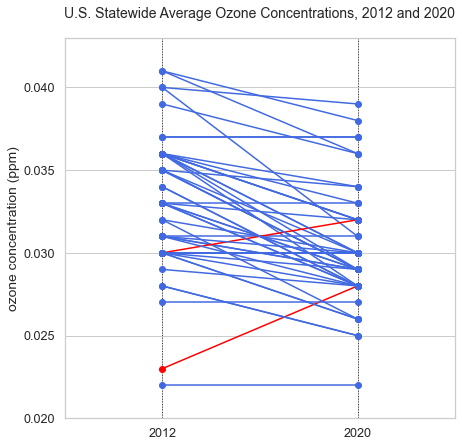

In [80]:
#Code for this plot was modified from author Selva Prabhakaran's slope chart on
#https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/
import matplotlib.lines as mlines

def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='royalblue' if p1[1]-p2[1] >= 0 else 'red',  marker='o', markersize=6)
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1,1, figsize=(7,7))

# Vertical Lines 
ax.vlines(x=1, ymin= 0, ymax=1, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=0, ymax=1, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=mrg1Rounded3['Arithmetic Mean_x'], x=np.repeat(1, mrg1Rounded3.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=mrg1Rounded3['Arithmetic Mean_y'], x=np.repeat(3, mrg1Rounded3.shape[0]), s=10, color='black', alpha=0.7)

# Line Segments and Annotation
for p1, p2, c in zip(mrg1Rounded3['Arithmetic Mean_x'], mrg1Rounded3['Arithmetic Mean_y'], mrg1Rounded3['State Name']):
    newline([1,p1], [3,p2])
    
# Title and Labels
ax.set_title('U.S. Statewide Average Ozone Concentrations, 2012 and 2020', pad=20, fontsize=14)
ax.set(xlim=(0,4), ylim=(0.020,0.043), ylabel='ozone concentration (ppm)')
ax.set_xticks([1,3])
ax.set_xticklabels(['2012', '2020'])

In [81]:
fig.savefig('o_slopechart_12_20')

In [82]:
plt.close()

In [83]:
#which states have increased levels of ozone?
ozone1StateIncreaseRounded3 = mrg1Rounded3[mrg1Rounded3['Arithmetic Mean_y'] > mrg1Rounded3['Arithmetic Mean_x']].copy()
ozone1StateIncreaseRounded3['Difference'] = ((ozone1StateIncreaseRounded3['Arithmetic Mean_y']) - (ozone1StateIncreaseRounded3['Arithmetic Mean_x'])).copy()
ozone1StateIncreaseRounded3Sorted = ozone1StateIncreaseRounded3.sort_values('Difference', ascending = False)
ozone1StateIncreaseRounded3Sorted

,State Name,Arithmetic Mean_x,Arithmetic Mean_y,Difference
1,Alaska,0.023,0.028,0.005
25,Montana,0.030,0.032,0.002


Text(0.5, 1.0, 'States with Increased Concentrations of Ozone\n between 2012 and 2020')

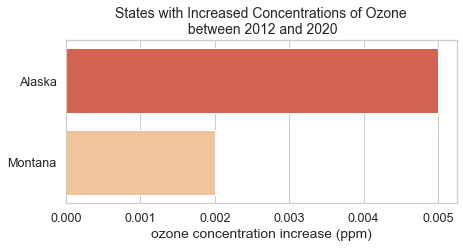

In [84]:
#create barplot
sns.set(style='whitegrid', context='notebook', rc={'figure.figsize': (7,3)}, font_scale=1.15)
sns.barplot(x = ozone1StateIncreaseRounded3Sorted['Difference'], y = ozone1StateIncreaseRounded3Sorted['State Name'], palette = 'OrRd_r')
plt.xlabel('ozone concentration increase (ppm)')
plt.ylabel('')
plt.title('States with Increased Concentrations of Ozone\n between 2012 and 2020', fontsize = 14)

In [85]:
plt.close()

[Text(1, 0, '2012'), Text(3, 0, '2020')]

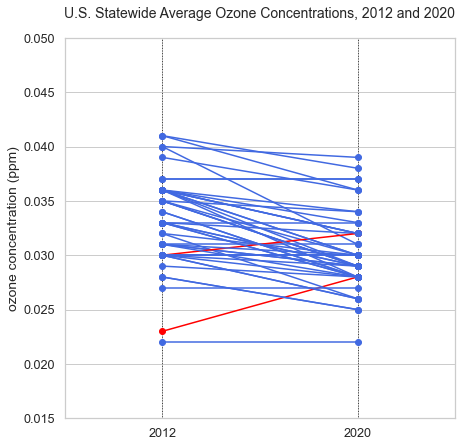

In [86]:
#re-plot with same ylimits as 1999-2012 slopechart for comparison 
#Code for this plot was modified from author Selva Prabhakaran's slope chart on
#https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/
def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='royalblue' if p1[1]-p2[1] >= 0 else 'red',  marker='o', markersize=6)
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1,1, figsize=(7,7))

# Vertical Lines 
ax.vlines(x=1, ymin= 0, ymax=1, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=0, ymax=1, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=mrg1Rounded3['Arithmetic Mean_x'], x=np.repeat(1, mrg1Rounded3.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=mrg1Rounded3['Arithmetic Mean_y'], x=np.repeat(3, mrg1Rounded3.shape[0]), s=10, color='black', alpha=0.7)

# Line Segments and Annotation
for p1, p2, c in zip(mrg1Rounded3['Arithmetic Mean_x'], mrg1Rounded3['Arithmetic Mean_y'], mrg1Rounded3['State Name']):
    newline([1,p1], [3,p2])
    
# Title and Labels
ax.set_title('U.S. Statewide Average Ozone Concentrations, 2012 and 2020', pad=20, fontsize=14)
ax.set(xlim=(0,4), ylim=(0.015,0.05), ylabel='ozone concentration (ppm)') #modified ylim to match 1999-2012 slopechart
ax.set_xticks([1,3])
ax.set_xticklabels(['2012', '2020'])


In [87]:
 fig.savefig('o_slopechart_12_20samescale')

In [88]:
plt.close()

### Which states have the highest levels of ozone?


In [89]:
d0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   State Name       50 non-null     object 
 1   Arithmetic Mean  50 non-null     float64
dtypes: float64(1), object(1)
memory usage: 928.0+ bytes


In [90]:
#use dataframe that has been rounded to 3 decimal places
d0Rounded3TopTen = d0Rounded3.sort_values('Arithmetic Mean', ascending = False).head(10)
d0Rounded3TopTen

,State Name,Arithmetic Mean
49,Wyoming,0.048
11,Idaho,0.043
43,Utah,0.043
41,Tennessee,0.041
32,North Carolina,0.040
2,Arizona,0.039
16,Kentucky,0.039
9,Georgia,0.038
23,Mississippi,0.038
13,Indiana,0.038


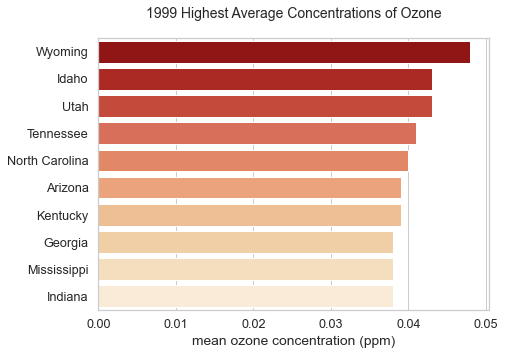

In [91]:
#create barplots
sns.set(style='whitegrid', context='notebook', rc={'figure.figsize': (7,5)}, font_scale=1.15)
sns.barplot(x = d0Rounded3TopTen['Arithmetic Mean'], y = d0Rounded3TopTen['State Name'], palette = 'OrRd_r')
plt.xlabel('mean ozone concentration (ppm)')
plt.ylabel('')
plt.title('1999 Highest Average Concentrations of Ozone', pad=20, fontsize = 14)
plt.savefig('o_1999highest_barchart')

In [92]:
plt.close()

In [93]:
#repeat top ten visualizations for years 2012 and 2020
#use dataframe that has been rounded to 3 decimal places
d1Rounded3TopTen = d1Rounded3.sort_values('Arithmetic Mean', ascending = False).head(10)
d1Rounded3TopTen

,State Name,Arithmetic Mean
43,Utah,0.041
5,Colorado,0.041
49,Wyoming,0.040
24,Missouri,0.040
27,Nevada,0.039
2,Arizona,0.037
30,New Mexico,0.037
40,South Dakota,0.036
21,Michigan,0.036
16,Kentucky,0.036


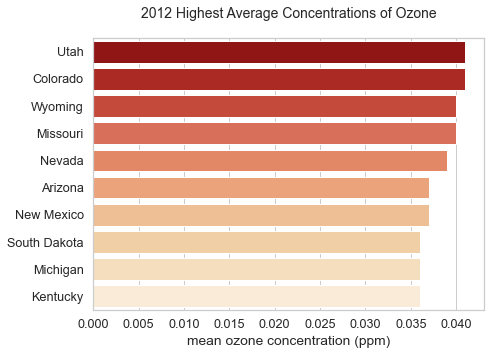

In [94]:
sns.barplot(x = d1Rounded3TopTen['Arithmetic Mean'], y = d1Rounded3TopTen['State Name'], palette = 'OrRd_r')
plt.xlabel('mean ozone concentration (ppm)')
plt.ylabel('')
plt.title('2012 Highest Average Concentrations of Ozone', pad=20, fontsize=14)
plt.savefig('o_2012highest_barchart')

In [95]:
plt.close()

In [96]:
d2Rounded3TopTen = d2Rounded3.sort_values('Arithmetic Mean', ascending = False).head(10)
d2Rounded3TopTen

,State Name,Arithmetic Mean
49,Wyoming,0.039
5,Colorado,0.038
2,Arizona,0.037
30,New Mexico,0.037
43,Utah,0.036
27,Nevada,0.036
6,Connecticut,0.034
11,Idaho,0.034
40,South Dakota,0.033
38,Rhode Island,0.033


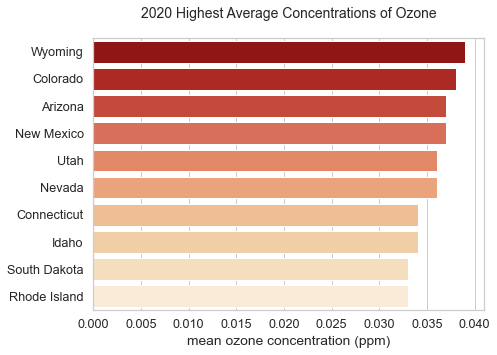

In [97]:
sns.barplot(x = d2Rounded3TopTen['Arithmetic Mean'], y = d2Rounded3TopTen['State Name'], palette = 'OrRd_r')
plt.xlabel('mean ozone concentration (ppm)')
plt.ylabel('')
plt.title('2020 Highest Average Concentrations of Ozone', pad=20,  fontsize=14)
plt.savefig('o_2020highest_barchart')

In [98]:
plt.close()

### Which states have the lowest levels of ozone?

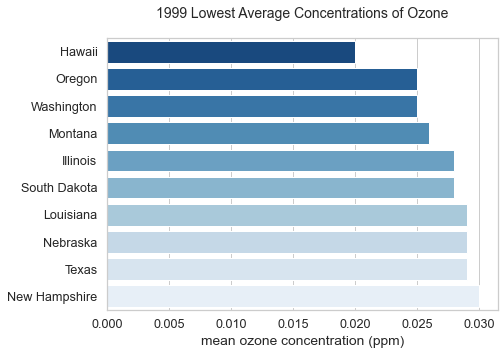

In [99]:
d0Rounded3LowestTen = d0Rounded3.sort_values('Arithmetic Mean').head(10)
sns.barplot(x = d0Rounded3LowestTen['Arithmetic Mean'], y = d0Rounded3LowestTen['State Name'], palette = "Blues_r")
plt.xlabel('mean ozone concentration (ppm)')
plt.ylabel('')
plt.title('1999 Lowest Average Concentrations of Ozone', pad=20, fontsize=14)
plt.savefig('o_1999lowest_barchart')

In [100]:
plt.close()

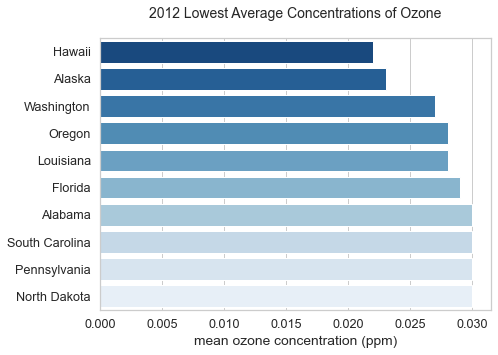

In [101]:
d1Rounded3LowestTen = d1Rounded3.sort_values('Arithmetic Mean').head(10)
sns.barplot(x = d1Rounded3LowestTen['Arithmetic Mean'], y = d1Rounded3LowestTen['State Name'], palette = 'Blues_r')
plt.xlabel('mean ozone concentration (ppm)')
plt.ylabel('')
plt.title('2012 Lowest Average Concentrations of Ozone', pad=20, fontsize=14)
plt.savefig('o_2012lowest_barchart')

In [102]:
plt.close()

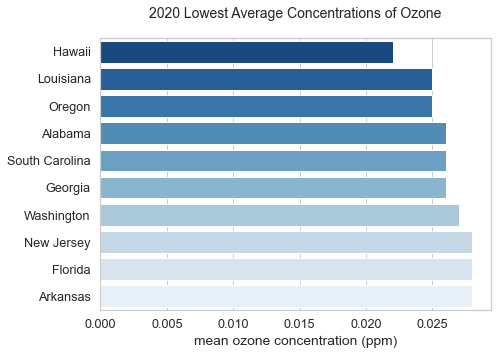

In [103]:
d2Rounded3LowestTen = d2Rounded3.sort_values('Arithmetic Mean').head(10)
sns.barplot(x = d2Rounded3LowestTen['Arithmetic Mean'], y = d2Rounded3LowestTen['State Name'], palette = 'Blues_r')
plt.xlabel('mean ozone concentration (ppm)')
plt.ylabel('')
plt.title('2020 Lowest Average Concentrations of Ozone', pad=20, fontsize=14)
plt.savefig('o_2020lowest_barchart')

In [104]:
plt.close()

### Show entire list of states on bar charts for each year

In [105]:
d0Rounded3Sorted = d0Rounded3.sort_values('Arithmetic Mean', ascending=False)

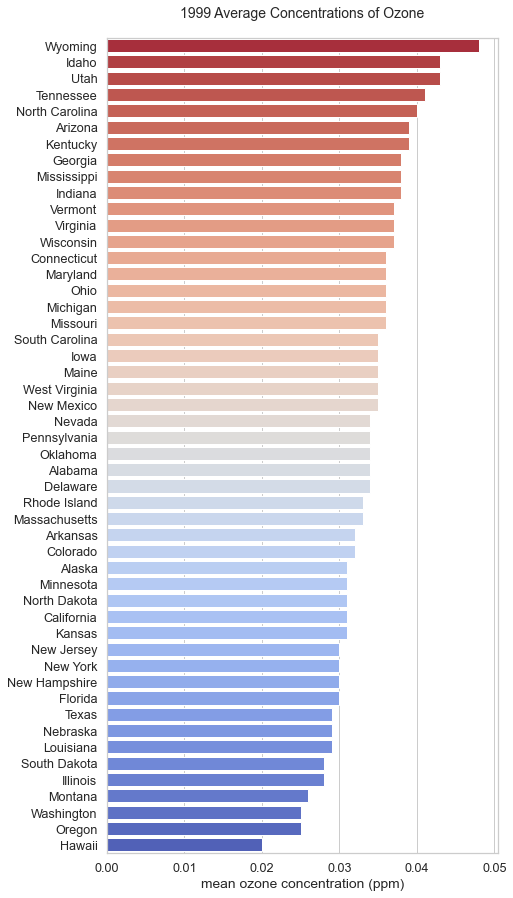

In [106]:
sns.set(style='whitegrid', context='notebook', rc={'figure.figsize': (7,15)}, font_scale=1.15)
sns.barplot(x = d0Rounded3Sorted['Arithmetic Mean'], y = d0Rounded3Sorted['State Name'], palette = 'coolwarm_r')
plt.xlabel('mean ozone concentration (ppm)')
plt.ylabel('')
plt.title('1999 Average Concentrations of Ozone', pad=20, fontsize=14)
plt.savefig('o_1999all_barchart')

In [107]:
plt.close()

In [108]:
d1Rounded3Sorted = d1Rounded3.sort_values('Arithmetic Mean', ascending=False)

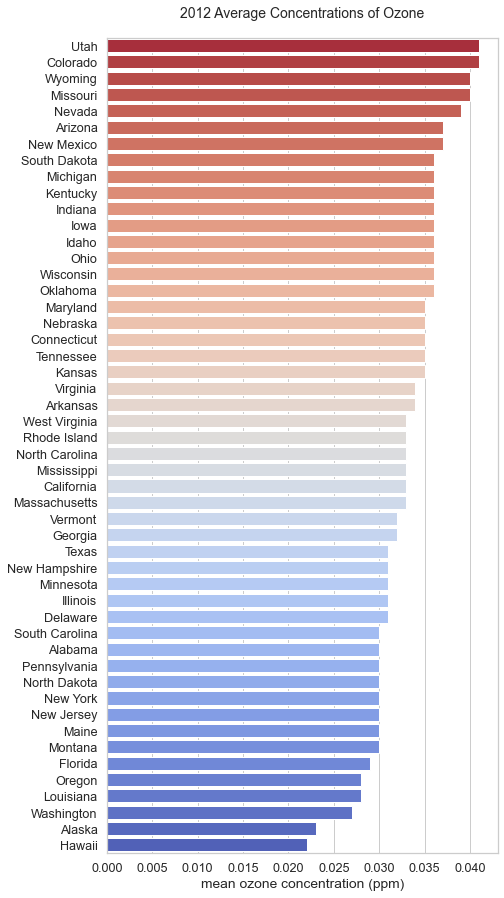

In [109]:
sns.barplot(x = d1Rounded3Sorted['Arithmetic Mean'], y = d1Rounded3Sorted['State Name'], palette = 'coolwarm_r')
plt.xlabel('mean ozone concentration (ppm)')
plt.ylabel('')
plt.title('2012 Average Concentrations of Ozone', pad=20, fontsize=14)
plt.savefig('o_2012all_barchart')

In [110]:
plt.close()

In [111]:
d2Rounded3Sorted = d2Rounded3.sort_values('Arithmetic Mean', ascending=False)

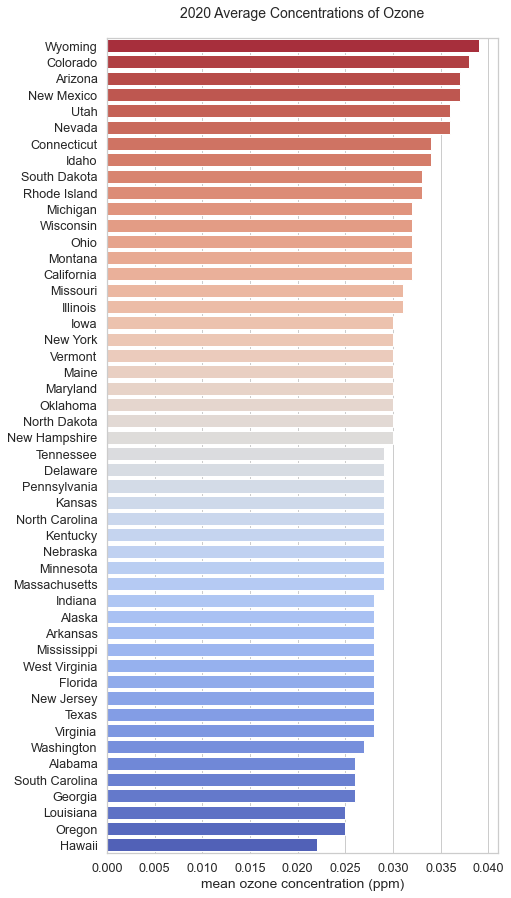

In [112]:
sns.barplot(x = d2Rounded3Sorted['Arithmetic Mean'], y = d2Rounded3Sorted['State Name'], palette = 'coolwarm_r')
plt.xlabel('mean ozone concentration (ppm)')
plt.ylabel('')
plt.title('2020 Average Concentrations of Ozone', pad=20, fontsize=14)
plt.savefig('o_2020all_barchart')

In [113]:
plt.close()

### Show maps for each year

In [114]:
#Code for visualizing maps was modified from author Jonathan Cutrer's GeoPandas Tutorials articles:
#https://jcutrer.com/python/learn-geopandas-plotting-tornados
#https://jcutrer.com/python/learn-geopandas-plotting-usmaps

stateMap = gpd.read_file('C:\\Users\\Mary\\CIS5898\\cb_2014_us_state_5m\\cb_2014_us_state_5m.shp') #read in shapefile
stateMap = stateMap.to_crs("EPSG:3395") #reproject to Mercator

In [115]:
#merge d0Rounded3 with df from shapefile (stateMap)
ozone1999Map = pd.merge(stateMap, d0Rounded3, left_on=stateMap['NAME'], 
                right_on=d0Rounded3['State Name'], how='left')


<AxesSubplot:title={'center':'1999 Average Ozone Concentrations by State'}>

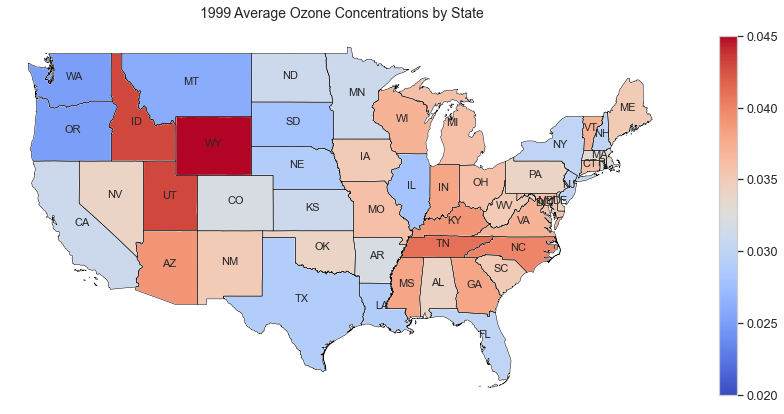

In [116]:
#plot 1999 map
fig = plt.figure(1, figsize=(15,12)) 
ax = fig.add_subplot()
ax.set_title('1999 Average Ozone Concentrations by State', fontsize=14)

# US Lower 48 Bounding Box
# -141.00000, 26.00000, -65.50000, 72.00000

ax.set_xlim(-14100244, -7200000)
ax.set_ylim(2600000, 6550000)
ax.set_axis_off()

ozone1999Map.apply(lambda x: ax.annotate(
    text=x['STUSPS'],
    xy=x['geometry'].centroid.coords[0],
    ha='center',
    fontsize=11), axis=1);

stateMap.boundary.plot(ax=ax, color = 'black', linewidth=.5)
ozone1999Map.plot(ax = ax, column='Arithmetic Mean', cmap = 'coolwarm', legend=True, vmax = 0.045,
                 legend_kwds={'orientation': "vertical", "shrink": 0.55})

In [117]:
fig.savefig('o_1999map_withUSPS')

In [118]:
plt.close()

<AxesSubplot:title={'center':'1999 Average Ozone Concentrations by State'}>

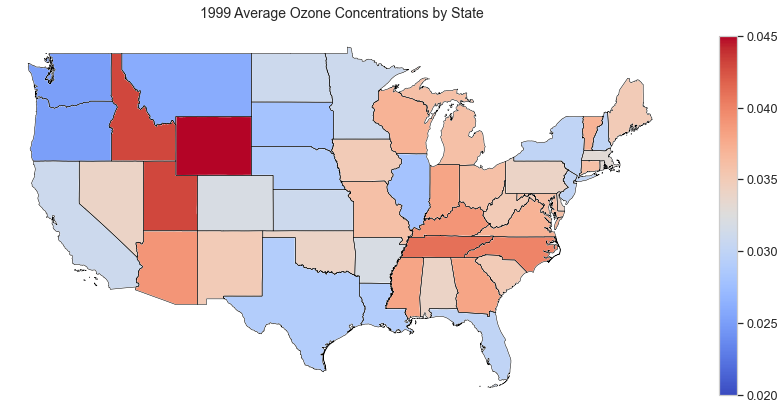

In [119]:
#Code for visualizing maps was modified from author Jonathan Cutrer's GeoPandas Tutorials articles:
#https://jcutrer.com/python/learn-geopandas-plotting-tornados
#https://jcutrer.com/python/learn-geopandas-plotting-usmaps

#plot 1999 map without state abbreviations
fig = plt.figure(1, figsize=(15,12)) 
ax = fig.add_subplot()
ax.set_title('1999 Average Ozone Concentrations by State', fontsize=14)

# US Lower 48 Bounding Box
# -141.00000, 26.00000, -65.50000, 72.00000

ax.set_xlim(-14100244, -7200000)
ax.set_ylim(2600000, 6550000)
ax.set_axis_off()

stateMap.boundary.plot(ax=ax, color = 'black', linewidth=.5)
ozone1999Map.plot(ax = ax, column='Arithmetic Mean', cmap = 'coolwarm', legend=True, vmax = 0.045,
                 legend_kwds={'orientation': "vertical", "shrink": 0.55})

In [120]:
fig.savefig('o_1999map_noUSPS')

In [121]:
plt.close()

In [122]:
#merge d1Rounded3 with df from shapefile (stateMap)
ozone2012Map = pd.merge(stateMap, d1Rounded3, left_on=stateMap['NAME'], 
                right_on=d1Rounded3['State Name'], how='left')

<AxesSubplot:title={'center':'2012 Average Ozone Concentrations by State'}>

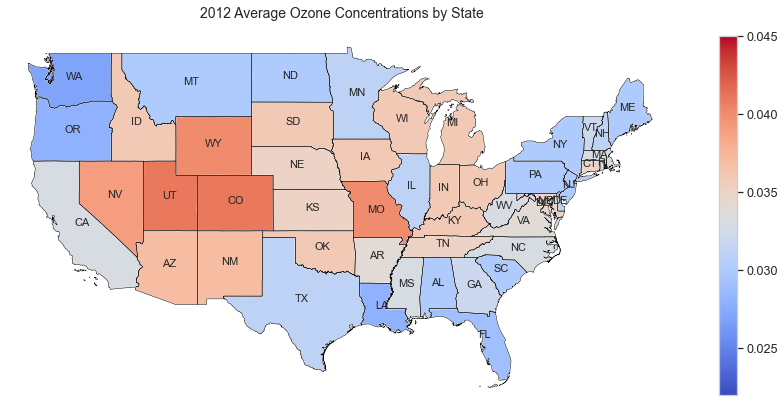

In [123]:
#Code for visualizing maps was modified from author Jonathan Cutrer's GeoPandas Tutorials articles:
#https://jcutrer.com/python/learn-geopandas-plotting-tornados
#https://jcutrer.com/python/learn-geopandas-plotting-usmaps
#plot 2012 map
fig = plt.figure(1, figsize=(15,12)) 
ax = fig.add_subplot()
ax.set_title('2012 Average Ozone Concentrations by State', fontsize=14)

# US Lower 48 Bounding Box
# -141.00000, 26.00000, -65.50000, 72.00000

ax.set_xlim(-14100244, -7200000)
ax.set_ylim(2600000, 6550000)
ax.set_axis_off()

ozone2012Map.apply(lambda x: ax.annotate(
    text=x['STUSPS'],
    xy=x['geometry'].centroid.coords[0],
    ha='center',
    fontsize=11), axis=1);

stateMap.boundary.plot(ax=ax, color = 'black', linewidth=.5)
ozone2012Map.plot(ax = ax, column='Arithmetic Mean', cmap = 'coolwarm', legend=True, vmax = 0.045,
                 legend_kwds={'orientation': "vertical", "shrink": 0.55})

In [124]:
fig.savefig('o_2012map_withUSPS')

In [125]:
plt.close()

<AxesSubplot:title={'center':'2012 Average Ozone Concentrations by State'}>

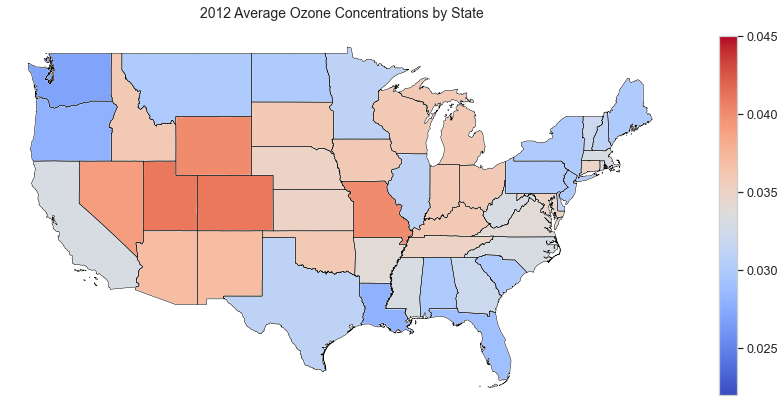

In [126]:
#Code for visualizing maps was modified from author Jonathan Cutrer's GeoPandas Tutorials articles:
#https://jcutrer.com/python/learn-geopandas-plotting-tornados
#https://jcutrer.com/python/learn-geopandas-plotting-usmaps
#plot 2012 map without state abbreviations
fig = plt.figure(1, figsize=(15,12)) 
ax = fig.add_subplot()
ax.set_title('2012 Average Ozone Concentrations by State', fontsize=14)

# US Lower 48 Bounding Box
# -141.00000, 26.00000, -65.50000, 72.00000

ax.set_xlim(-14100244, -7200000)
ax.set_ylim(2600000, 6550000)
ax.set_axis_off()

stateMap.boundary.plot(ax=ax, color = 'black', linewidth=.5)
ozone2012Map.plot(ax = ax, column='Arithmetic Mean', cmap = 'coolwarm', legend=True, vmax = 0.045,
                 legend_kwds={'orientation': "vertical", "shrink": 0.55})

In [127]:
fig.savefig('o_2012map_noUSPS')

In [128]:
plt.close()

In [129]:
#merge d2Rounded3 with df from shapefile (stateMap)
ozone2020Map = pd.merge(stateMap, d2Rounded3, left_on=stateMap['NAME'], 
                right_on=d2Rounded3['State Name'], how='left')


<AxesSubplot:title={'center':'2020 Average Ozone Concentrations by State'}>

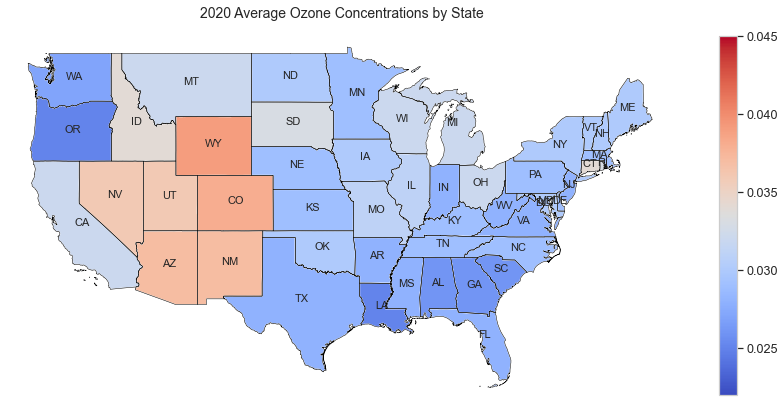

In [130]:
#Code for visualizing maps was modified from author Jonathan Cutrer's GeoPandas Tutorials articles:
#https://jcutrer.com/python/learn-geopandas-plotting-tornados
#https://jcutrer.com/python/learn-geopandas-plotting-usmaps
#plot 2020 map
fig = plt.figure(1, figsize=(15,12)) 
ax = fig.add_subplot()
ax.set_title('2020 Average Ozone Concentrations by State', fontsize=14)

# US Lower 48 Bounding Box
# -141.00000, 26.00000, -65.50000, 72.00000

ax.set_xlim(-14100244, -7200000)
ax.set_ylim(2600000, 6550000)
ax.set_axis_off()

ozone2020Map.apply(lambda x: ax.annotate(
    text=x['STUSPS'],
    xy=x['geometry'].centroid.coords[0],
    ha='center',
    fontsize=11), axis=1);

stateMap.boundary.plot(ax=ax, color = 'black', linewidth=.5)
ozone2020Map.plot(ax = ax, column='Arithmetic Mean', cmap = 'coolwarm', legend=True, vmax = 0.045,
                 legend_kwds={'orientation': "vertical", "shrink": 0.55 })

In [131]:
fig.savefig('o_2020map_withUSPS')

In [132]:
plt.close()

<AxesSubplot:title={'center':'2020 Average Ozone Concentrations by State'}>

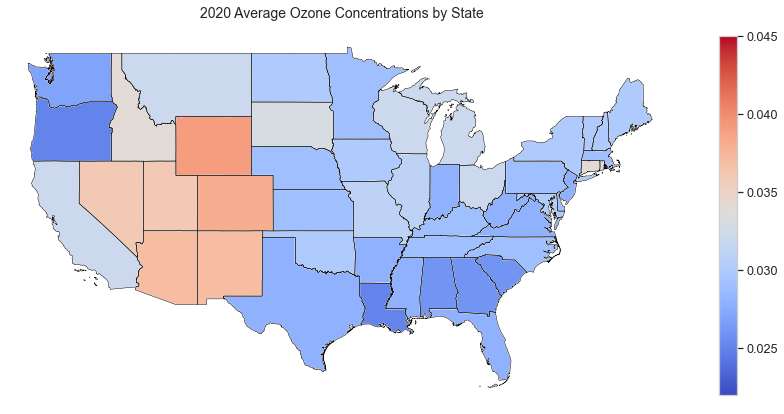

In [133]:
#Code for visualizing maps was modified from author Jonathan Cutrer's GeoPandas Tutorials articles:
#https://jcutrer.com/python/learn-geopandas-plotting-tornados
#https://jcutrer.com/python/learn-geopandas-plotting-usmaps
#plot 2020 map without state abbreviations
fig = plt.figure(1, figsize=(15,12)) 
ax = fig.add_subplot()
ax.set_title('2020 Average Ozone Concentrations by State', fontsize=14)

# US Lower 48 Bounding Box
# -141.00000, 26.00000, -65.50000, 72.00000

ax.set_xlim(-14100244, -7200000)
ax.set_ylim(2600000, 6550000)
ax.set_axis_off()

stateMap.boundary.plot(ax=ax, color = 'black', linewidth=.5)
ozone2020Map.plot(ax = ax, column='Arithmetic Mean', cmap = 'coolwarm', legend=True, vmax = 0.045,
                 legend_kwds={'orientation': "vertical", "shrink": 0.55 })

In [134]:
fig.savefig('o_2020map_noUSPS')

In [135]:
plt.close()

### Replot bar charts using the same scale

In [136]:
fig.savefig('o_2020map_withUSPS')

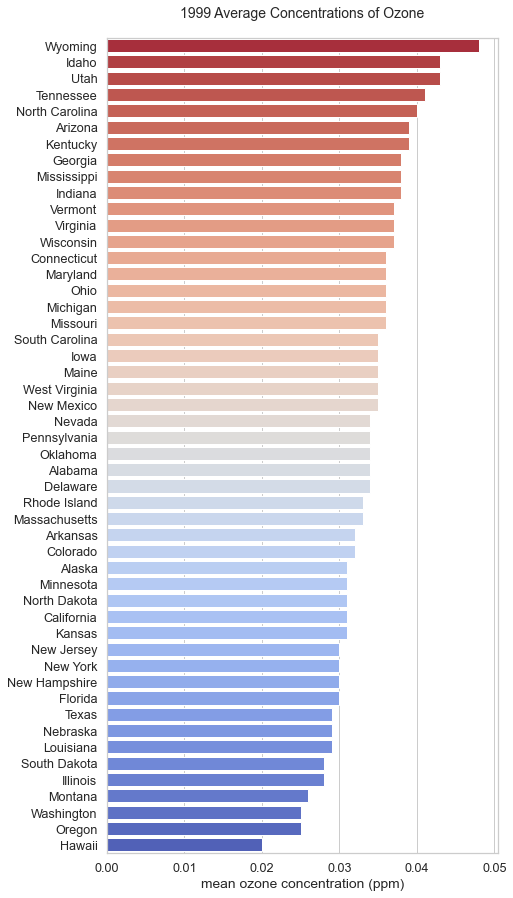

In [137]:
sns.set(style='whitegrid', context='notebook', rc={'figure.figsize': (7,15)}, font_scale=1.15)
sns.barplot(x = d0Rounded3Sorted['Arithmetic Mean'], y = d0Rounded3Sorted['State Name'], palette = 'coolwarm_r')
plt.xlabel('mean ozone concentration (ppm)')
plt.ylabel('')
plt.title('1999 Average Concentrations of Ozone', pad=20, fontsize=14)
plt.savefig('o_1999all_barchartsamescale')

In [138]:
plt.close()

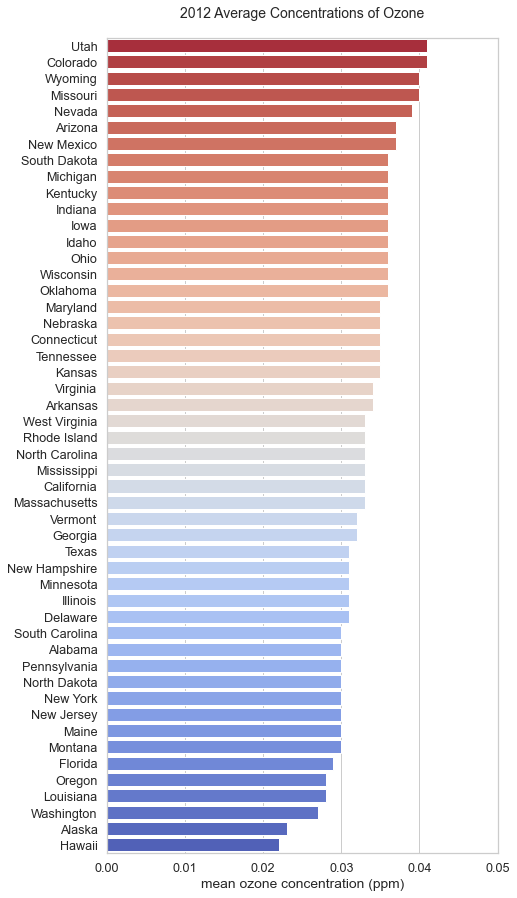

In [139]:
sns.barplot(x = d1Rounded3Sorted['Arithmetic Mean'], y = d1Rounded3Sorted['State Name'], palette = 'coolwarm_r')
plt.xlabel('mean ozone concentration (ppm)')
plt.ylabel('')
plt.title('2012 Average Concentrations of Ozone', pad=20, fontsize=14)
plt.xlim(0, 0.05)
plt.savefig('o_2012all_barchartsamescale')

In [140]:
plt.close()

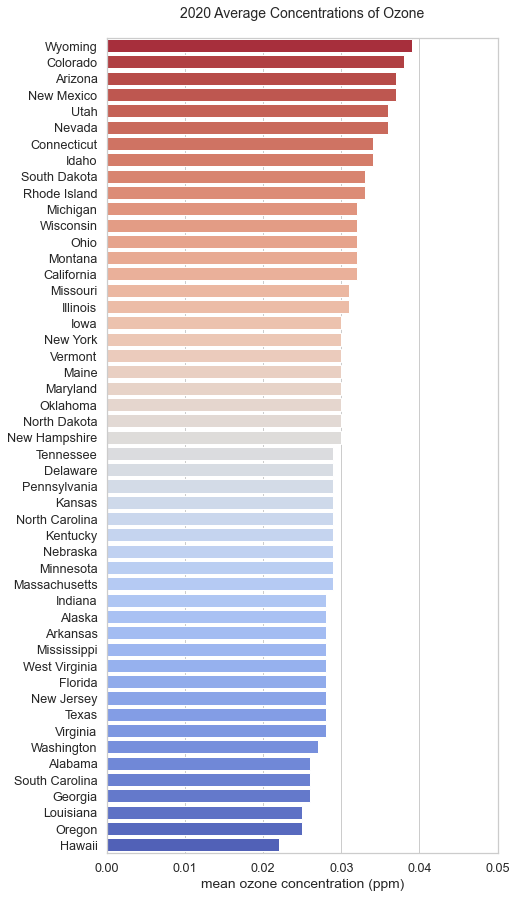

In [141]:
sns.barplot(x = d2Rounded3Sorted['Arithmetic Mean'], y = d2Rounded3Sorted['State Name'], palette = 'coolwarm_r')
plt.xlabel('mean ozone concentration (ppm)')
plt.ylabel('')
plt.title('2020 Average Concentrations of Ozone', pad=20, fontsize=14)
plt.xlim(0, 0.05)
plt.savefig('o_2020all_barchartsamescale')

In [142]:
plt.close()

### End ozone studies